#Background Information

Using climatic data for the purposes of modeling and predicting river discharge rates is the primary goal of this study. This notebook is one of several steps within the scope of my independent research project. I am using climate data to model river discharge in the Colorado River Basin. 


#Breakdown of contents in this Jupyter Notebook.

In this notebook, we will look at a few different time series models to predict river flow. We will use the statistical and machine learning packages Scikit-Learn, PyTorch, and StatsModels and compare the prediction performance of select models from each. These are all freely available and documentation for each package can be found below.

1. [Scikit-Learn](https://scikit-learn.org/stable/index.html)
2. [Flow Forecast (PyTorch)](https://flow-forecast.readthedocs.io/en/latest/#)
3. [StatsModels](https://www.statsmodels.org/stable/index.html)

#Let's get started!

Setting up our environment

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn as skl

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Mount our drive so we can access files from our google drive account. 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Selecting our data file and assigning it to the variable "file"

In [ ]:
file = "/content/drive/MyDrive/CURRENT Work files/GBI/Research Project/New Report/Model_Building/Final Model/data_for_model.csv"

Converting our csv in a Pandas DataFrame

In [ ]:
data = pd.read_csv(file)

Verifying our data is now accessible. 

In [ ]:
data.head()

,Unnamed: 0,DATE,DC_INFLOW,BIG_SANDY_OPENING_(342)SWE_IN,BIG_SANDY_OPENING_(342)PA_IN,BIG_SANDY_OPENING_(342)ATO_DEGF,BIG_SANDY_OPENING_(342)STO_2IN_DEGF,BIG_SANDY_OPENING_(342)SMP_2IN_PCT,TRIAL_LAKE_(828)SWE_IN,TRIAL_LAKE_(828)ATO_DEGF,...,WOLF_CREEK_SUMMIT_(874)SWE_IN,WOLF_CREEK_SUMMIT_(874)ATO_DEGF,WOLF_CREEK_SUMMIT_(874)STO_2IN_DEGF,WOLF_CREEK_SUMMIT_(874)SMP_2IN_PCT,EAST_WILLOW_CREEK_(461)PA_IN,EAST_WILLOW_CREEK_(461)SWE_IN,EAST_WILLOW_CREEK_(461)SMP_2IN_PCT,SLM_762_STO_2IN_DEGF,SLM_762_SWE_IN,BU_380_SMP_2IN_PCT
0,0,Jan 2006,13970,7.4,8.1,29,31,0.1,15.6,24,...,4.4,24.0,32.0,21.9,2.0,0.9,NaN,52.0,5.7,19.8
1,1,Feb 2006,15450,11.3,11.8,14,31,0.1,21.6,17,...,7.7,20.0,32.0,19.2,3.0,1.8,7.4,52.0,7.9,18.5
2,2,Mar 2006,11020,13.1,13.2,22,31,0.0,24.7,19,...,10.1,33.0,32.0,16.2,3.3,1.8,11.7,48.0,9.5,18.5
3,3,Apr 2006,11100,15.4,15.5,29,32,10.8,30.6,27,...,20.8,31.0,32.0,22.7,6.4,4.1,27.4,41.0,13.4,27.8
4,4,May 2006,10630,10.8,16.9,27,35,23.5,33.2,31,...,25.7,36.0,32.0,32.2,6.9,0.0,17.2,35.0,12.1,21.1


Transforming our data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 40 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0                           180 non-null    int64  
 1   DATE                                 180 non-null    object 
 2   DC_INFLOW                            180 non-null    int64  
 3   BIG_SANDY_OPENING_(342)SWE_IN        180 non-null    float64
 4   BIG_SANDY_OPENING_(342)PA_IN         180 non-null    float64
 5   BIG_SANDY_OPENING_(342)ATO_DEGF      180 non-null    int64  
 6   BIG_SANDY_OPENING_(342)STO_2IN_DEGF  180 non-null    int64  
 7   BIG_SANDY_OPENING_(342)SMP_2IN_PCT   180 non-null    float64
 8   TRIAL_LAKE_(828)SWE_IN               180 non-null    float64
 9   TRIAL_LAKE_(828)ATO_DEGF             180 non-null    int64  
 10  TRIAL_LAKE_(828)SMP_2IN_PCT          180 non-null    float64
 11  LOST_DOG_(940)SWE_IN            

Since we have some null values in our dataset, lets fill those in! We will use the fillna() method. 

In [ ]:
data = data.fillna(method="ffill")

Great, we should be ready to proceed to building our first model.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 40 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0                           180 non-null    int64  
 1   DATE                                 180 non-null    object 
 2   DC_INFLOW                            180 non-null    int64  
 3   BIG_SANDY_OPENING_(342)SWE_IN        180 non-null    float64
 4   BIG_SANDY_OPENING_(342)PA_IN         180 non-null    float64
 5   BIG_SANDY_OPENING_(342)ATO_DEGF      180 non-null    int64  
 6   BIG_SANDY_OPENING_(342)STO_2IN_DEGF  180 non-null    int64  
 7   BIG_SANDY_OPENING_(342)SMP_2IN_PCT   180 non-null    float64
 8   TRIAL_LAKE_(828)SWE_IN               180 non-null    float64
 9   TRIAL_LAKE_(828)ATO_DEGF             180 non-null    int64  
 10  TRIAL_LAKE_(828)SMP_2IN_PCT          180 non-null    float64
 11  LOST_DOG_(940)SWE_IN            

#Starting with a simple time series model

We will be using [SKforecast](https://www.cienciadedatos.net/documentos/py27-time-series-forecasting-python-scikitlearn.html), which uses scikit-learns regression models and adapts them to time dependent problems.

Let's install this before we move on using !pip

In [ ]:
!pip install skforecast

     |████████████████████████████████| 87 kB 4.3 MB/s 
     |████████████████████████████████| 76 kB 4.0 MB/s 
     |████████████████████████████████| 9.8 MB 38.4 MB/s 
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.63.0
    Uninstalling tqdm-4.63.0:
      Successfully uninstalled tqdm-4.63.0
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
#Importing the packages listed in the link above
# ==============================================================================
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregCustom import ForecasterAutoregCustom
from skforecast.ForecasterAutoregMultiOutput import ForecasterAutoregMultiOutput
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster

from joblib import dump, load

Great! All of our packages are ready to go. 

#Last bit of data cleaning

We need to do one more data transformation in the date column so that it can be accepted by our model. We will split our date column into 'year', 'month', 'day', as per the formatting requirements. Then they will be joined to a new single DATE column. 

In [ ]:
data[["month", "year"]] = data["DATE"].str.split(" ", expand = True)

In [ ]:
data.head()

,Unnamed: 0,DATE,DC_INFLOW,BIG_SANDY_OPENING_(342)SWE_IN,BIG_SANDY_OPENING_(342)PA_IN,BIG_SANDY_OPENING_(342)ATO_DEGF,BIG_SANDY_OPENING_(342)STO_2IN_DEGF,BIG_SANDY_OPENING_(342)SMP_2IN_PCT,TRIAL_LAKE_(828)SWE_IN,TRIAL_LAKE_(828)ATO_DEGF,...,WOLF_CREEK_SUMMIT_(874)STO_2IN_DEGF,WOLF_CREEK_SUMMIT_(874)SMP_2IN_PCT,EAST_WILLOW_CREEK_(461)PA_IN,EAST_WILLOW_CREEK_(461)SWE_IN,EAST_WILLOW_CREEK_(461)SMP_2IN_PCT,SLM_762_STO_2IN_DEGF,SLM_762_SWE_IN,BU_380_SMP_2IN_PCT,month,year
0,0,Jan 2006,13970,7.4,8.1,29,31,0.1,15.6,24,...,32.0,21.9,2.0,0.9,NaN,52.0,5.7,19.8,Jan,2006
1,1,Feb 2006,15450,11.3,11.8,14,31,0.1,21.6,17,...,32.0,19.2,3.0,1.8,7.4,52.0,7.9,18.5,Feb,2006
2,2,Mar 2006,11020,13.1,13.2,22,31,0.0,24.7,19,...,32.0,16.2,3.3,1.8,11.7,48.0,9.5,18.5,Mar,2006
3,3,Apr 2006,11100,15.4,15.5,29,32,10.8,30.6,27,...,32.0,22.7,6.4,4.1,27.4,41.0,13.4,27.8,Apr,2006
4,4,May 2006,10630,10.8,16.9,27,35,23.5,33.2,31,...,32.0,32.2,6.9,0.0,17.2,35.0,12.1,21.1,May,2006


There are now 2 additional columns at the end of our dataframe called "month" and "year". We must now transform our month column into a format that is accepted by our model. 

In [ ]:
d = {'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May': 5, 'Jun':6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, "Nov":11, 'Dec':12 }

In [ ]:
data.month = data.month.map(d)

In [ ]:
data.head()

,Unnamed: 0,DATE,DC_INFLOW,BIG_SANDY_OPENING_(342)SWE_IN,BIG_SANDY_OPENING_(342)PA_IN,BIG_SANDY_OPENING_(342)ATO_DEGF,BIG_SANDY_OPENING_(342)STO_2IN_DEGF,BIG_SANDY_OPENING_(342)SMP_2IN_PCT,TRIAL_LAKE_(828)SWE_IN,TRIAL_LAKE_(828)ATO_DEGF,...,WOLF_CREEK_SUMMIT_(874)STO_2IN_DEGF,WOLF_CREEK_SUMMIT_(874)SMP_2IN_PCT,EAST_WILLOW_CREEK_(461)PA_IN,EAST_WILLOW_CREEK_(461)SWE_IN,EAST_WILLOW_CREEK_(461)SMP_2IN_PCT,SLM_762_STO_2IN_DEGF,SLM_762_SWE_IN,BU_380_SMP_2IN_PCT,month,year
0,0,Jan 2006,13970,7.4,8.1,29,31,0.1,15.6,24,...,32.0,21.9,2.0,0.9,NaN,52.0,5.7,19.8,1,2006
1,1,Feb 2006,15450,11.3,11.8,14,31,0.1,21.6,17,...,32.0,19.2,3.0,1.8,7.4,52.0,7.9,18.5,2,2006
2,2,Mar 2006,11020,13.1,13.2,22,31,0.0,24.7,19,...,32.0,16.2,3.3,1.8,11.7,48.0,9.5,18.5,3,2006
3,3,Apr 2006,11100,15.4,15.5,29,32,10.8,30.6,27,...,32.0,22.7,6.4,4.1,27.4,41.0,13.4,27.8,4,2006
4,4,May 2006,10630,10.8,16.9,27,35,23.5,33.2,31,...,32.0,32.2,6.9,0.0,17.2,35.0,12.1,21.1,5,2006


Great! We can see that our months have been converted to their numeric values. Now we must add a day column, which will be filled with 1s since these are all start of month values. We need a day column in order to proceed. 

In [ ]:
data.insert(loc = 42,column = "day", value = 1)

In [ ]:
data.head()

,Unnamed: 0,DATE,DC_INFLOW,BIG_SANDY_OPENING_(342)SWE_IN,BIG_SANDY_OPENING_(342)PA_IN,BIG_SANDY_OPENING_(342)ATO_DEGF,BIG_SANDY_OPENING_(342)STO_2IN_DEGF,BIG_SANDY_OPENING_(342)SMP_2IN_PCT,TRIAL_LAKE_(828)SWE_IN,TRIAL_LAKE_(828)ATO_DEGF,...,WOLF_CREEK_SUMMIT_(874)SMP_2IN_PCT,EAST_WILLOW_CREEK_(461)PA_IN,EAST_WILLOW_CREEK_(461)SWE_IN,EAST_WILLOW_CREEK_(461)SMP_2IN_PCT,SLM_762_STO_2IN_DEGF,SLM_762_SWE_IN,BU_380_SMP_2IN_PCT,month,year,day
0,0,Jan 2006,13970,7.4,8.1,29,31,0.1,15.6,24,...,21.9,2.0,0.9,NaN,52.0,5.7,19.8,1,2006,1
1,1,Feb 2006,15450,11.3,11.8,14,31,0.1,21.6,17,...,19.2,3.0,1.8,7.4,52.0,7.9,18.5,2,2006,1
2,2,Mar 2006,11020,13.1,13.2,22,31,0.0,24.7,19,...,16.2,3.3,1.8,11.7,48.0,9.5,18.5,3,2006,1
3,3,Apr 2006,11100,15.4,15.5,29,32,10.8,30.6,27,...,22.7,6.4,4.1,27.4,41.0,13.4,27.8,4,2006,1
4,4,May 2006,10630,10.8,16.9,27,35,23.5,33.2,31,...,32.2,6.9,0.0,17.2,35.0,12.1,21.1,5,2006,1


Great, we've formatted our data. The date column is now redundant, so we are going to drop it from our data. 

In [ ]:
data.drop("DATE", axis = 1)

,Unnamed: 0,DC_INFLOW,BIG_SANDY_OPENING_(342)SWE_IN,BIG_SANDY_OPENING_(342)PA_IN,BIG_SANDY_OPENING_(342)ATO_DEGF,BIG_SANDY_OPENING_(342)STO_2IN_DEGF,BIG_SANDY_OPENING_(342)SMP_2IN_PCT,TRIAL_LAKE_(828)SWE_IN,TRIAL_LAKE_(828)ATO_DEGF,TRIAL_LAKE_(828)SMP_2IN_PCT,...,WOLF_CREEK_SUMMIT_(874)SMP_2IN_PCT,EAST_WILLOW_CREEK_(461)PA_IN,EAST_WILLOW_CREEK_(461)SWE_IN,EAST_WILLOW_CREEK_(461)SMP_2IN_PCT,SLM_762_STO_2IN_DEGF,SLM_762_SWE_IN,BU_380_SMP_2IN_PCT,month,year,day
0,0,13970,7.4,8.1,29,31,0.1,15.6,24,28.1,...,21.9,2.0,0.9,NaN,52.0,5.7,19.8,1,2006,1
1,1,15450,11.3,11.8,14,31,0.1,21.6,17,27.7,...,19.2,3.0,1.8,7.4,52.0,7.9,18.5,2,2006,1
2,2,11020,13.1,13.2,22,31,0.0,24.7,19,27.7,...,16.2,3.3,1.8,11.7,48.0,9.5,18.5,3,2006,1
3,3,11100,15.4,15.5,29,32,10.8,30.6,27,28.6,...,22.7,6.4,4.1,27.4,41.0,13.4,27.8,4,2006,1
4,4,10630,10.8,16.9,27,35,23.5,33.2,31,29.7,...,32.2,6.9,0.0,17.2,35.0,12.1,21.1,5,2006,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,175,14860,0.0,16.5,58,52,2.7,0.0,54,2.5,...,9.9,16.6,0.0,7.3,53.0,0.0,4.9,8,2020,1
176,176,11350,0.0,17.2,30,46,1.8,0.0,35,1.3,...,8.7,16.9,0.0,4.9,44.0,0.0,9.3,9,2020,1
177,177,11660,0.0,0.0,32,38,1.4,0.0,43,0.9,...,8.3,0.0,0.0,3.6,39.0,0.0,2.4,10,2020,1
178,178,11730,0.6,0.8,20,32,1.2,0.6,30,2.5,...,9.6,0.4,0.1,5.0,33.0,0.9,14.4,11,2020,1


Okay, lets proceed!

In [ ]:
data['DATE'] = pd.to_datetime(data[['year', 'month', 'day']], format='%Y/%m/%d')
data = data.set_index('DATE')
data = data.rename(columns={'x': 'y'})
data = data.asfreq('MS')
data = data.sort_index()
data.head()

,Unnamed: 0,DC_INFLOW,BIG_SANDY_OPENING_(342)SWE_IN,BIG_SANDY_OPENING_(342)PA_IN,BIG_SANDY_OPENING_(342)ATO_DEGF,BIG_SANDY_OPENING_(342)STO_2IN_DEGF,BIG_SANDY_OPENING_(342)SMP_2IN_PCT,TRIAL_LAKE_(828)SWE_IN,TRIAL_LAKE_(828)ATO_DEGF,TRIAL_LAKE_(828)SMP_2IN_PCT,...,WOLF_CREEK_SUMMIT_(874)SMP_2IN_PCT,EAST_WILLOW_CREEK_(461)PA_IN,EAST_WILLOW_CREEK_(461)SWE_IN,EAST_WILLOW_CREEK_(461)SMP_2IN_PCT,SLM_762_STO_2IN_DEGF,SLM_762_SWE_IN,BU_380_SMP_2IN_PCT,month,year,day
DATE,,,,,,,,,,,,,,,,,,,,,
2006-01-01,0,13970,7.4,8.1,29,31,0.1,15.6,24,28.1,...,21.9,2.0,0.9,NaN,52.0,5.7,19.8,1,2006,1
2006-02-01,1,15450,11.3,11.8,14,31,0.1,21.6,17,27.7,...,19.2,3.0,1.8,7.4,52.0,7.9,18.5,2,2006,1
2006-03-01,2,11020,13.1,13.2,22,31,0.0,24.7,19,27.7,...,16.2,3.3,1.8,11.7,48.0,9.5,18.5,3,2006,1
2006-04-01,3,11100,15.4,15.5,29,32,10.8,30.6,27,28.6,...,22.7,6.4,4.1,27.4,41.0,13.4,27.8,4,2006,1
2006-05-01,4,10630,10.8,16.9,27,35,23.5,33.2,31,29.7,...,32.2,6.9,0.0,17.2,35.0,12.1,21.1,5,2006,1


We need to drop one more column, but in order to do this I need it's full name. To get the name I will add all column names to a list and then select it from there.

In [ ]:
my_list = data.columns.values.tolist()

print(my_list)

['Unnamed: 0', 'DC_INFLOW', 'BIG_SANDY_OPENING_(342)SWE_IN', 'BIG_SANDY_OPENING_(342)PA_IN', 'BIG_SANDY_OPENING_(342)ATO_DEGF', 'BIG_SANDY_OPENING_(342)STO_2IN_DEGF', 'BIG_SANDY_OPENING_(342)SMP_2IN_PCT', 'TRIAL_LAKE_(828)SWE_IN', 'TRIAL_LAKE_(828)ATO_DEGF', 'TRIAL_LAKE_(828)SMP_2IN_PCT', 'LOST_DOG_(940)SWE_IN', 'LOST_DOG_(940)ATO_DEGF', 'LOST_DOG_(940)STO_2IN_DEGF', 'LOST_DOG_(940)SMP_2IN_PCT', 'WHITE_RIVER_#1_(864)SWE_IN', 'WHITE_RIVER_#1_(864)SMP_2IN_PCT', 'DONKEY_RESERVOIR_(452)SWE_IN', 'DONKEY_RESERVOIR_(452)PA_IN', 'DONKEY_RESERVOIR_(452)ATO_DEGF', 'DONKEY_RESERVOIR_(452)SMP_2IN_PCT', 'DILLS_CAMP_(444)SMP_2IN_PCT', 'HOOSIER_PASS_(531)SWE_IN', 'HOOSIER_PASS_(531)PA_IN', 'HOOSIER_PASS_(531)ATO_DEGF', 'HOOSIER_PASS_(531)SMP_2IN_PCT', 'LONE_CONE_(589)SWE_IN', 'LONE_CONE_(589)PA_IN', 'LONE_CONE_(589)ATO_DEGF', 'LONE_CONE_(589)SMP_2IN_PCT', 'WOLF_CREEK_SUMMIT_(874)SWE_IN', 'WOLF_CREEK_SUMMIT_(874)ATO_DEGF', 'WOLF_CREEK_SUMMIT_(874)STO_2IN_DEGF', 'WOLF_CREEK_SUMMIT_(874)SMP_2IN_PCT', 'E

There it is! The first column, 'Unnamed: 0', is what we need to remove. 

In [ ]:
data.drop("Unnamed: 0", axis = 1)

,DC_INFLOW,BIG_SANDY_OPENING_(342)SWE_IN,BIG_SANDY_OPENING_(342)PA_IN,BIG_SANDY_OPENING_(342)ATO_DEGF,BIG_SANDY_OPENING_(342)STO_2IN_DEGF,BIG_SANDY_OPENING_(342)SMP_2IN_PCT,TRIAL_LAKE_(828)SWE_IN,TRIAL_LAKE_(828)ATO_DEGF,TRIAL_LAKE_(828)SMP_2IN_PCT,LOST_DOG_(940)SWE_IN,...,WOLF_CREEK_SUMMIT_(874)SMP_2IN_PCT,EAST_WILLOW_CREEK_(461)PA_IN,EAST_WILLOW_CREEK_(461)SWE_IN,EAST_WILLOW_CREEK_(461)SMP_2IN_PCT,SLM_762_STO_2IN_DEGF,SLM_762_SWE_IN,BU_380_SMP_2IN_PCT,month,year,day
DATE,,,,,,,,,,,,,,,,,,,,,
2006-01-01,13970,7.4,8.1,29,31,0.1,15.6,24,28.1,14.3,...,21.9,2.0,0.9,NaN,52.0,5.7,19.8,1,2006,1
2006-02-01,15450,11.3,11.8,14,31,0.1,21.6,17,27.7,20.2,...,19.2,3.0,1.8,7.4,52.0,7.9,18.5,2,2006,1
2006-03-01,11020,13.1,13.2,22,31,0.0,24.7,19,27.7,23.5,...,16.2,3.3,1.8,11.7,48.0,9.5,18.5,3,2006,1
2006-04-01,11100,15.4,15.5,29,32,10.8,30.6,27,28.6,28.0,...,22.7,6.4,4.1,27.4,41.0,13.4,27.8,4,2006,1
2006-05-01,10630,10.8,16.9,27,35,23.5,33.2,31,29.7,21.0,...,32.2,6.9,0.0,17.2,35.0,12.1,21.1,5,2006,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-01,14860,0.0,16.5,58,52,2.7,0.0,54,2.5,0.0,...,9.9,16.6,0.0,7.3,53.0,0.0,4.9,8,2020,1
2020-09-01,11350,0.0,17.2,30,46,1.8,0.0,35,1.3,0.0,...,8.7,16.9,0.0,4.9,44.0,0.0,9.3,9,2020,1
2020-10-01,11660,0.0,0.0,32,38,1.4,0.0,43,0.9,0.0,...,8.3,0.0,0.0,3.6,39.0,0.0,2.4,10,2020,1


While we're at it, lets drop the "year", "month", and "day" columns since we have transformed our dates into a single column already. 

In [ ]:
modified = data.drop(["year", "month", "day", "Unnamed: 0"], axis = 1)

In [ ]:
modified.head()

,DC_INFLOW,BIG_SANDY_OPENING_(342)SWE_IN,BIG_SANDY_OPENING_(342)PA_IN,BIG_SANDY_OPENING_(342)ATO_DEGF,BIG_SANDY_OPENING_(342)STO_2IN_DEGF,BIG_SANDY_OPENING_(342)SMP_2IN_PCT,TRIAL_LAKE_(828)SWE_IN,TRIAL_LAKE_(828)ATO_DEGF,TRIAL_LAKE_(828)SMP_2IN_PCT,LOST_DOG_(940)SWE_IN,...,WOLF_CREEK_SUMMIT_(874)SWE_IN,WOLF_CREEK_SUMMIT_(874)ATO_DEGF,WOLF_CREEK_SUMMIT_(874)STO_2IN_DEGF,WOLF_CREEK_SUMMIT_(874)SMP_2IN_PCT,EAST_WILLOW_CREEK_(461)PA_IN,EAST_WILLOW_CREEK_(461)SWE_IN,EAST_WILLOW_CREEK_(461)SMP_2IN_PCT,SLM_762_STO_2IN_DEGF,SLM_762_SWE_IN,BU_380_SMP_2IN_PCT
DATE,,,,,,,,,,,,,,,,,,,,,
2006-01-01,13970,7.4,8.1,29,31,0.1,15.6,24,28.1,14.3,...,4.4,24.0,32.0,21.9,2.0,0.9,NaN,52.0,5.7,19.8
2006-02-01,15450,11.3,11.8,14,31,0.1,21.6,17,27.7,20.2,...,7.7,20.0,32.0,19.2,3.0,1.8,7.4,52.0,7.9,18.5
2006-03-01,11020,13.1,13.2,22,31,0.0,24.7,19,27.7,23.5,...,10.1,33.0,32.0,16.2,3.3,1.8,11.7,48.0,9.5,18.5
2006-04-01,11100,15.4,15.5,29,32,10.8,30.6,27,28.6,28.0,...,20.8,31.0,32.0,22.7,6.4,4.1,27.4,41.0,13.4,27.8
2006-05-01,10630,10.8,16.9,27,35,23.5,33.2,31,29.7,21.0,...,25.7,36.0,32.0,32.2,6.9,0.0,17.2,35.0,12.1,21.1


Okay great all of our data is now assigned to the modified variable. All of our columns look good. Lets get to modeling. 

In [ ]:
(modified.index == pd.date_range(start=modified.index.min(),
                             end=modified.index.max(),
                             freq=modified.index.freq)).all()

True

The above code verifies that we have a temporary index for our dates. 

#Basic Modeling to Find our Bearings

First we are going to create a simplified version of our model using a random forest regressor. We will build a model that will make predictions using ONLY previous streamflow data, and not our climactic attributes. This is simply to get a feel of what our model performace will look like without our supplementary data.

#Splitting our data into training and testing sets.

When building models, it is common practice to use 80% of your data to train your model and 20% to test it in order to gauge the performance of your model's predictions. We have 15 years of data, which means that with 180 total months, we will use the first 144 rows for training, and the final 36 for testing. 

In [ ]:
x = modified["DC_INFLOW"] #our response variable

y = modified.loc[:, modified.columns != "DC_INFLOW"] #our explanatory variables, this code selects all columns but DC_INFLOW

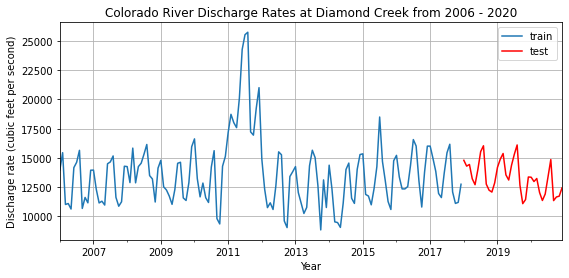

In [ ]:
steps = 36
data_train = modified[:-steps]
data_test  = modified[-steps:]

fig, ax=plt.subplots(figsize=(9, 4))
data_train["DC_INFLOW"].plot(ax=ax, label='train')
data_test["DC_INFLOW"].plot(ax=ax, label='test', c = 'r')

plt.title("Colorado River Discharge Rates at Diamond Creek from 2006 - 2020")
plt.xlabel("Year")
plt.ylabel("Discharge rate (cubic feet per second)")
plt.grid(True)

ax.legend();

This is a graph of our Diamond Creek flow rates. The blue represents the timespan of our training set, and the orange represents the period of our test set. 

We will now train a Random Forest Regressor that uses the previous 24 months of data in order to makes predictions on flow rate. We have not incorporated any of our other attributes yet. This means it will base it's predictions solely on previous flow rates. 

In [ ]:
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=42),
                lags = 24
                )

forecaster.fit(y=data_train['DC_INFLOW'])
forecaster

ForecasterAutoreg 
Regressor: RandomForestRegressor(random_state=42) 
Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24] 
Window size: 24 
Included exogenous: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [Timestamp('2006-01-01 00:00:00'), Timestamp('2017-12-01 00:00:00')] 
Training index type: DatetimeIndex 
Training index frequency: MS 
Regressor parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False} 
Creation date: 2022-03-29 16:46:59 
Last fit date: 2022-03-29 16:47:00 
Skforecast version: 0.4.3 

Using a lag of 24 means that the model will use the previous 24 months of data to make it's predicitons. 

We will now use our trained model to predict the next 36 values. 

In [ ]:
steps = 36
predictions = forecaster.predict(steps=steps)
predictions.head(5)

2018-01-01    14800.44
2018-02-01    14897.55
2018-03-01    13036.52
2018-04-01    11407.97
2018-05-01    11364.48
Freq: MS, Name: pred, dtype: float64

Lets overlay our predictions on top of our previous graph of discharge rates. 

The output above shows the prediction date, along with the predicted Rate of Flow (in cubic feet per second)

In [ ]:
from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual) * 100)  # MAPE
    #me = np.mean(forecast - actual)             # ME
    #mae = np.mean(np.abs(forecast - actual))    # MAE
    #mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    nse = ((1-(np.sum((forecast - actual) ** 2)) / (np.sum((actual - np.mean(actual)) ** 2)))) #NSE
    #mins = np.amin(np.hstack([forecast[:,None], 
                              #actual[:,None]]), axis=1)
    #maxs = np.amax(np.hstack([forecast[:,None], 
                              #actual[:,None]]), axis=1)
    #minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape,'rmse':rmse, 'corr':corr, 'nse':nse})

print('Forecast Accuracy of: DC_INFLOW')
accuracy_prod = forecast_accuracy(predictions, data_test["DC_INFLOW"])
for k, v in accuracy_prod.items():
    print((k), ': ', round(v,4))

Forecast Accuracy of: DC_INFLOW
mape :  9.384
rmse :  1496.3135
corr :  0.3877
nse :  -0.1507


In [ ]:
from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual) * 100)  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    nse = ((1-(np.sum((forecast - actual) ** 2)) / (np.sum((actual - np.mean(actual)) ** 2)))) #NSE
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'corr':corr, 'nse':nse, 'minmax':minmax})

print('Forecast Accuracy of: DC_INFLOW')
accuracy_prod = forecast_accuracy(predictions, data_test["DC_INFLOW"])
for k, v in accuracy_prod.items():
    print((k), ': ', round(v,4))

Forecast Accuracy of: DC_INFLOW
mape :  9.384
me :  -6.849
mae :  1220.4161
mpe :  0.0066
rmse :  1496.3135
corr :  0.3877
nse :  -0.1507
minmax :  0.0859


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: Support for multi-dimensional indexing (e.g

In [ ]:
actual = data_test['DC_INFLOW']

In [ ]:
 mape = np.mean(np.abs(predictions - actual)/np.abs(actual))  # MAPE
me = np.mean(predictions - actual)             # ME
mae = np.mean(np.abs(predictions - actual))    # MAE
mpe = np.mean((predictions - actual)/actual)   # MPE
rmse = np.mean((predictions - actual)**2)**.5  # RMSE

The method of quanitifying the accuracy of your predictions is called the Mean Squared Error, or MSE. 

In [ ]:
error_rate = mean_squared_error(
                y_true = data_test['DC_INFLOW'],
                y_pred = predictions
                )
print(f"Test error (mse): {error_rate}")

Test error (mse): 1137629.3145166666


A bit high! Let's see if we can tune our model to make better predictions. From the Skforecaster documentation:

"In order to identify the best combination of lags and hyperparameters, Skforecast has the grid_search_forecaster function. This function uses backtesting to compare the performance obtained with each configuration of the model. It is important not to include the test data in the search process to avoid overfitting problems."

In [ ]:
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=42),
                lags      = 12 # This value will be replaced in the grid search
                )

# Regressor's hyperparameters
param_grid = {'n_estimators': [100, 500],
              'max_depth': [3, 5, 10]}

# Lags used as predictors
lags_grid = [10, 20]

results_grid = grid_search_forecaster(
                        forecaster         = forecaster,
                        y                  = data_train['DC_INFLOW'],
                        param_grid         = param_grid,
                        lags_grid          = lags_grid,
                        steps              = 10,
                        refit              = True,
                        metric             = 'mean_squared_error',
                        initial_train_size = int(len(data_train)*0.5),
                        fixed_train_size   = False,
                        return_best        = True,
                        verbose            = False
                        )

Number of models compared: 12


loop lags_grid: 100%|███████████████████████████████████████| 2/2 [01:23<00:00, 41.87s/it]


`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10] 
  Parameters: {'max_depth': 5, 'n_estimators': 100}
  Backtesting metric: 11497892.700479073



Lets see the results!

In [ ]:
results_grid

,lags,params,metric,max_depth,n_estimators
2,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 5, 'n_estimators': 100}",1.149789e+07,5,100
4,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 10, 'n_estimators': 100}",1.155180e+07,10,100
3,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 5, 'n_estimators': 500}",1.162571e+07,5,500
5,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 10, 'n_estimators': 500}",1.174668e+07,10,500
1,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 3, 'n_estimators': 500}",1.176663e+07,3,500
0,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 3, 'n_estimators': 100}",1.200062e+07,3,100
9,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 5, 'n_estimators': 500}",1.441844e+07,5,500
7,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 3, 'n_estimators': 500}",1.450699e+07,3,500
6,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 3, 'n_estimators': 100}",1.471493e+07,3,100
11,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 10, 'n_estimators': 500}",1.502364e+07,10,500


The most accurate results are obtained when a lag time of 10 is used, with a max_depth of 5 and n_estimators 100. For more on hyperparameters and what they mean, see the links below:

1. [SKLearn random forest regressor documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
2. [Berkeley Stats Dept. Paper](https://www.stat.berkeley.edu/~breiman/randomforest2001.pdf)

For now, I will at least say that the number of trees in the forest is represented by n_estimators and max_depth is the maximum number of levels within each decision tree.

Lets test out a model with the hyperparameters above. 

In [ ]:
regressor = RandomForestRegressor(max_depth=5, n_estimators=100, random_state=42)

forecaster = ForecasterAutoreg(
                regressor = regressor,
                lags      = 10
                )

forecaster.fit(y=data_train['DC_INFLOW'])

In [ ]:
predictions = forecaster.predict(steps=steps)

In [ ]:
error_mse = mean_squared_error(
                y_true = data_test['DC_INFLOW'],
                y_pred = predictions
                )
print(f"Test error (mse): {error_mse}")

Test error (mse): 2238954.0174768693


Our MSE actually went up after using these parameters. However, this model is only testing DC_INFLOW against its previous values, and hasn't been given the rest of our data! So when we put this into perspective, there is the potential for vast improvement once we add these new attributes to the model. 

#One more preprocessing step

In order to use this data for a VAR (Vector Autoregressions), we must remove the seasonality aspect of our data in order to make it stationary. Lets first use an augmented Dickey-Fuller test in order to see if all of our variables are stationary or not. 

[Using this article as a foundation](https://towardsdatascience.com/how-to-remove-non-stationarity-in-time-series-forecasting-563c05c4bfc7), we will test if our data is stationary, and if not then we will transform it. 

The null and alternative hypotheses of this test are as follows:
1. The null hypothesis: the distribution is non-stationary, time-dependent (it has a unit root).
2. The alternative hypothesis: the distribution is stationary, not time-dependent (can’t be represented by a unit root).

If it is smaller than a critical threshold of 0.05 or 0.01, we reject the null hypothesis and conclude that the series is stationary. Otherwise, we fail to reject the null and conclude the series is non-stationary.

In [ ]:
#we are going to drop our missing values because otherwise the adfuller test will not run

data2 = modified.dropna()

In [ ]:
from statsmodels.tsa.stattools import adfuller

def adfuller_test(series, sig=0.05, name=''):
    res = adfuller(series, autolag='AIC')    
    p_value = round(res[1], 3) 

    if p_value <= sig:
        print(f" {name} : P-Value = {p_value} => Stationary. ")
    else:
        print(f" {name} : P-Value = {p_value} => Non-stationary.")

for name, column in data2.iteritems():
    adfuller_test(column, name=column.name)

 DC_INFLOW : P-Value = 0.025 => Stationary. 
 BIG_SANDY_OPENING_(342)SWE_IN : P-Value = 0.009 => Stationary. 
 BIG_SANDY_OPENING_(342)PA_IN : P-Value = 0.002 => Stationary. 
 BIG_SANDY_OPENING_(342)ATO_DEGF : P-Value = 0.017 => Stationary. 
 BIG_SANDY_OPENING_(342)STO_2IN_DEGF : P-Value = 0.117 => Non-stationary.
 BIG_SANDY_OPENING_(342)SMP_2IN_PCT : P-Value = 0.016 => Stationary. 
 TRIAL_LAKE_(828)SWE_IN : P-Value = 0.002 => Stationary. 
 TRIAL_LAKE_(828)ATO_DEGF : P-Value = 0.025 => Stationary. 
 TRIAL_LAKE_(828)SMP_2IN_PCT : P-Value = 0.606 => Non-stationary.
 LOST_DOG_(940)SWE_IN : P-Value = 0.009 => Stationary. 
 LOST_DOG_(940)ATO_DEGF : P-Value = 0.02 => Stationary. 
 LOST_DOG_(940)STO_2IN_DEGF : P-Value = 0.433 => Non-stationary.
 LOST_DOG_(940)SMP_2IN_PCT : P-Value = 0.297 => Non-stationary.
 WHITE_RIVER_#1_(864)SWE_IN : P-Value = 0.002 => Stationary. 
 WHITE_RIVER_#1_(864)SMP_2IN_PCT : P-Value = 0.011 => Stationary. 
 DONKEY_RESERVOIR_(452)SWE_IN : P-Value = 0.115 => Non-stati

So we can see most of our variables are in fact stationary. Let's do a round of differencing to see if we can get the few that are not in order. 

In [ ]:
data_differenced = data2.diff().dropna()
for name, column in data_differenced.iteritems():
    adfuller_test(column, name=column.name)

 DC_INFLOW : P-Value = 0.001 => Stationary. 
 BIG_SANDY_OPENING_(342)SWE_IN : P-Value = 0.0 => Stationary. 
 BIG_SANDY_OPENING_(342)PA_IN : P-Value = 0.005 => Stationary. 
 BIG_SANDY_OPENING_(342)ATO_DEGF : P-Value = 0.0 => Stationary. 
 BIG_SANDY_OPENING_(342)STO_2IN_DEGF : P-Value = 0.0 => Stationary. 
 BIG_SANDY_OPENING_(342)SMP_2IN_PCT : P-Value = 0.01 => Stationary. 
 TRIAL_LAKE_(828)SWE_IN : P-Value = 0.0 => Stationary. 
 TRIAL_LAKE_(828)ATO_DEGF : P-Value = 0.0 => Stationary. 
 TRIAL_LAKE_(828)SMP_2IN_PCT : P-Value = 0.021 => Stationary. 
 LOST_DOG_(940)SWE_IN : P-Value = 0.0 => Stationary. 
 LOST_DOG_(940)ATO_DEGF : P-Value = 0.0 => Stationary. 
 LOST_DOG_(940)STO_2IN_DEGF : P-Value = 0.0 => Stationary. 
 LOST_DOG_(940)SMP_2IN_PCT : P-Value = 0.003 => Stationary. 
 WHITE_RIVER_#1_(864)SWE_IN : P-Value = 0.0 => Stationary. 
 WHITE_RIVER_#1_(864)SMP_2IN_PCT : P-Value = 0.001 => Stationary. 
 DONKEY_RESERVOIR_(452)SWE_IN : P-Value = 0.0 => Stationary. 
 DONKEY_RESERVOIR_(452)PA_IN

After one round of differencing we have made achieved a stationary state with all of our variables! That means our degree of differencing = 1. This is important for building our model. 

#Building our model and hyperparameter selection

In [ ]:
# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

Testing causation using Grangers Causality Test.

[From Vector Autoregression (VAR) Examples in Python](https://www.machinelearningplus.com/time-series/vector-autoregression-examples-python/)

"The basis behind Vector AutoRegression is that each of the time series in the system influences each other. That is, you can predict the series with past values of itself along with other series in the system. Using Granger’s Causality Test, it’s possible to test this relationship before even building the model. So what does Granger’s Causality really test? Granger’s causality tests the null hypothesis that the coefficients of past values in the regression equation is zero. In simpler terms, the past values of time series (X) do not cause the other series (Y). So, if the p-value obtained from the test is lesser than the significance level of 0.05, then, you can safely reject the null hypothesis."

In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    
    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(data2, variables = data2.columns) 

,DC_INFLOW_x,BIG_SANDY_OPENING_(342)SWE_IN_x,BIG_SANDY_OPENING_(342)PA_IN_x,BIG_SANDY_OPENING_(342)ATO_DEGF_x,BIG_SANDY_OPENING_(342)STO_2IN_DEGF_x,BIG_SANDY_OPENING_(342)SMP_2IN_PCT_x,TRIAL_LAKE_(828)SWE_IN_x,TRIAL_LAKE_(828)ATO_DEGF_x,TRIAL_LAKE_(828)SMP_2IN_PCT_x,LOST_DOG_(940)SWE_IN_x,...,WOLF_CREEK_SUMMIT_(874)SWE_IN_x,WOLF_CREEK_SUMMIT_(874)ATO_DEGF_x,WOLF_CREEK_SUMMIT_(874)STO_2IN_DEGF_x,WOLF_CREEK_SUMMIT_(874)SMP_2IN_PCT_x,EAST_WILLOW_CREEK_(461)PA_IN_x,EAST_WILLOW_CREEK_(461)SWE_IN_x,EAST_WILLOW_CREEK_(461)SMP_2IN_PCT_x,SLM_762_STO_2IN_DEGF_x,SLM_762_SWE_IN_x,BU_380_SMP_2IN_PCT_x
DC_INFLOW_y,1.0000,0.0000,0.0004,0.0003,0.0000,0.0000,0.0000,0.0135,0.0000,0.0000,...,0.0000,0.0032,0.0001,0.6175,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
BIG_SANDY_OPENING_(342)SWE_IN_y,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0405,...,0.0037,0.0000,0.6892,0.0005,0.0000,0.0000,0.0000,0.0000,0.0026,0.0000
BIG_SANDY_OPENING_(342)PA_IN_y,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.3273,0.0015,0.0014,0.0000,0.0000,0.0000,0.0000,0.0000
BIG_SANDY_OPENING_(342)ATO_DEGF_y,0.0002,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.1877,0.0032,0.0000,...,0.0000,0.0021,0.0080,0.5451,0.0000,0.0010,0.1988,0.0000,0.0000,0.2909
BIG_SANDY_OPENING_(342)STO_2IN_DEGF_y,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0004,0.0007,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
BIG_SANDY_OPENING_(342)SMP_2IN_PCT_y,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0263,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
TRIAL_LAKE_(828)SWE_IN_y,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,...,0.0114,0.0000,0.7745,0.3984,0.0000,0.0000,0.0000,0.0000,0.0000,0.0003
TRIAL_LAKE_(828)ATO_DEGF_y,0.0064,0.0000,0.0000,0.0471,0.0000,0.0000,0.0000,1.0000,0.0003,0.0000,...,0.0000,0.0010,0.1736,0.3030,0.0000,0.0000,0.0392,0.0000,0.0000,0.0423
TRIAL_LAKE_(828)SMP_2IN_PCT_y,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,...,0.0000,0.0000,0.1907,0.0003,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
LOST_DOG_(940)SWE_IN_y,0.0000,0.0093,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,...,0.0093,0.0000,0.4137,0.0977,0.0000,0.0000,0.0000,0.0000,0.0008,0.0000


So for this model to run perform at it's best, and for our model to be valid, we must use only 12 variables total (inlcuding that of our variable of interest).

Lets build our model with the top 11 most correlated climate attributes. We will do some more processing real quick and the continue with our VARMA

#Processing Once More

In [ ]:
data2 = pd.DataFrame(data2)

In [ ]:
corr_matrix = data2.corr()

corr_2 = corr_matrix["DC_INFLOW"].sort_values(ascending=False)

In [ ]:
print(corr_2)

DC_INFLOW                              1.000000
EAST_WILLOW_CREEK_(461)PA_IN           0.354601
DONKEY_RESERVOIR_(452)PA_IN            0.331126
BIG_SANDY_OPENING_(342)PA_IN           0.297855
BIG_SANDY_OPENING_(342)STO_2IN_DEGF    0.233519
HOOSIER_PASS_(531)PA_IN                0.227467
SLM_762_STO_2IN_DEGF                   0.219283
LONE_CONE_(589)PA_IN                   0.214014
TRIAL_LAKE_(828)SWE_IN                 0.084825
LONE_CONE_(589)ATO_DEGF                0.067428
TRIAL_LAKE_(828)ATO_DEGF               0.052136
HOOSIER_PASS_(531)ATO_DEGF             0.046122
DONKEY_RESERVOIR_(452)ATO_DEGF         0.044713
WHITE_RIVER_#1_(864)SWE_IN             0.042618
DILLS_CAMP_(444)SMP_2IN_PCT            0.037048
EAST_WILLOW_CREEK_(461)SWE_IN          0.030592
WOLF_CREEK_SUMMIT_(874)ATO_DEGF        0.023609
LOST_DOG_(940)ATO_DEGF                 0.020409
WOLF_CREEK_SUMMIT_(874)STO_2IN_DEGF    0.014691
BIG_SANDY_OPENING_(342)ATO_DEGF        0.010427
LOST_DOG_(940)SWE_IN                   0

So our top 11 attributes are as follows: 



* EAST_WILLOW_CREEK_(461)PA_IN           0.427651
* DONKEY_RESERVOIR_(452)PA_IN            0.388954
* BIG_SANDY_OPENING_(342)PA_IN           0.357624
* LONE_CONE_(589)PA_IN                   0.257504
* SLM_762_STO_2IN_DEGF                   0.256455
* HOOSIER_PASS_(531)PA_IN                0.249768
* BIG_SANDY_OPENING_(342)STO_2IN_DEGF    0.238569
* TRIAL_LAKE_(828)SWE_IN                 0.168481
* HOOSIER_PASS_(531)ATO_DEGF             0.091691
* DONKEY_RESERVOIR_(452)ATO_DEGF         0.087655
* TRIAL_LAKE_(828)SMP_2IN_PCT            0.083601

In [ ]:
final_data = data2[["DC_INFLOW", "EAST_WILLOW_CREEK_(461)PA_IN", "DONKEY_RESERVOIR_(452)PA_IN", "BIG_SANDY_OPENING_(342)PA_IN", "LONE_CONE_(589)PA_IN", "SLM_762_STO_2IN_DEGF", "HOOSIER_PASS_(531)PA_IN", "BIG_SANDY_OPENING_(342)STO_2IN_DEGF", "TRIAL_LAKE_(828)SWE_IN", "HOOSIER_PASS_(531)ATO_DEGF", "DONKEY_RESERVOIR_(452)ATO_DEGF", "TRIAL_LAKE_(828)SMP_2IN_PCT"]]

Great we now have our final dataset lets goooooooooooooOOOOooOOooOoooooOOOOOooooooOoOoo

#Running through our tests one more time on our final dataset. 

Splitting our final_data into a training and test set. 

In [ ]:
x = final_data["DC_INFLOW"] #our response variable

y = final_data.loc[:, final_data.columns != "DC_INFLOW"] #our explanatory variables, this code selects all columns but DC_INFLOW

In [ ]:
steps = 36
data_train = final_data[:-steps]
data_test  = final_data[-steps:]

In [ ]:
from statsmodels.tsa.stattools import adfuller

def adfuller_test(series, sig=0.05, name=''):
    res = adfuller(series, autolag='AIC')    
    p_value = round(res[1], 3) 

    if p_value <= sig:
        print(f" {name} : P-Value = {p_value} => Stationary. ")
    else:
        print(f" {name} : P-Value = {p_value} => Non-stationary.")

for name, column in final_data.iteritems():
    adfuller_test(column, name=column.name)

 DC_INFLOW : P-Value = 0.025 => Stationary. 
 EAST_WILLOW_CREEK_(461)PA_IN : P-Value = 0.001 => Stationary. 
 DONKEY_RESERVOIR_(452)PA_IN : P-Value = 0.002 => Stationary. 
 BIG_SANDY_OPENING_(342)PA_IN : P-Value = 0.002 => Stationary. 
 LONE_CONE_(589)PA_IN : P-Value = 0.0 => Stationary. 
 SLM_762_STO_2IN_DEGF : P-Value = 0.043 => Stationary. 
 HOOSIER_PASS_(531)PA_IN : P-Value = 0.004 => Stationary. 
 BIG_SANDY_OPENING_(342)STO_2IN_DEGF : P-Value = 0.117 => Non-stationary.
 TRIAL_LAKE_(828)SWE_IN : P-Value = 0.002 => Stationary. 
 HOOSIER_PASS_(531)ATO_DEGF : P-Value = 0.026 => Stationary. 
 DONKEY_RESERVOIR_(452)ATO_DEGF : P-Value = 0.003 => Stationary. 
 TRIAL_LAKE_(828)SMP_2IN_PCT : P-Value = 0.606 => Non-stationary.


In [ ]:
grangers_causation_matrix(final_data, variables = final_data.columns)     

,DC_INFLOW_x,EAST_WILLOW_CREEK_(461)PA_IN_x,DONKEY_RESERVOIR_(452)PA_IN_x,BIG_SANDY_OPENING_(342)PA_IN_x,LONE_CONE_(589)PA_IN_x,SLM_762_STO_2IN_DEGF_x,HOOSIER_PASS_(531)PA_IN_x,BIG_SANDY_OPENING_(342)STO_2IN_DEGF_x,TRIAL_LAKE_(828)SWE_IN_x,HOOSIER_PASS_(531)ATO_DEGF_x,DONKEY_RESERVOIR_(452)ATO_DEGF_x,TRIAL_LAKE_(828)SMP_2IN_PCT_x
DC_INFLOW_y,1.0000,0.0000,0.0000,0.0004,0.0000,0.0,0.0,0.0,0.0,0.0088,0.1038,0.0000
EAST_WILLOW_CREEK_(461)PA_IN_y,0.0000,1.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000
DONKEY_RESERVOIR_(452)PA_IN_y,0.0000,0.0004,1.0000,0.0001,0.0003,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000
BIG_SANDY_OPENING_(342)PA_IN_y,0.0000,0.0014,0.0000,1.0000,0.0000,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000
LONE_CONE_(589)PA_IN_y,0.0000,0.1478,0.0005,0.0066,1.0000,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000
SLM_762_STO_2IN_DEGF_y,0.0000,0.0000,0.0000,0.0000,0.0000,1.0,0.0,0.0,0.0,0.0000,0.0000,0.0000
HOOSIER_PASS_(531)PA_IN_y,0.0000,0.0025,0.0006,0.0464,0.0421,0.0,1.0,0.0,0.0,0.0000,0.0000,0.0000
BIG_SANDY_OPENING_(342)STO_2IN_DEGF_y,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,1.0,0.0,0.0000,0.0000,0.0000
TRIAL_LAKE_(828)SWE_IN_y,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,1.0,0.0000,0.0000,0.0000
HOOSIER_PASS_(531)ATO_DEGF_y,0.0036,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,1.0000,0.1800,0.0028


In [ ]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(final_data)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
DC_INFLOW ::  345.11    > 311.1288  =>   True
EAST_WILLOW_CREEK_(461)PA_IN ::  265.4     > 263.2603  =>   True
DONKEY_RESERVOIR_(452)PA_IN ::  206.19    > 219.4051  =>   False
BIG_SANDY_OPENING_(342)PA_IN ::  155.46    > 179.5199  =>   False
LONE_CONE_(589)PA_IN ::  117.09    > 143.6691  =>   False
SLM_762_STO_2IN_DEGF ::  85.0      > 111.7797  =>   False
HOOSIER_PASS_(531)PA_IN ::  58.72     > 83.9383   =>   False
BIG_SANDY_OPENING_(342)STO_2IN_DEGF ::  34.48     > 60.0627   =>   False
TRIAL_LAKE_(828)SWE_IN ::  21.85     > 40.1749   =>   False
HOOSIER_PASS_(531)ATO_DEGF ::  10.28     > 24.2761   =>   False
DONKEY_RESERVOIR_(452)ATO_DEGF ::  2.81      > 12.3212   =>   False
TRIAL_LAKE_(828)SMP_2IN_PCT ::  0.13      > 4.1296    =>   False


As previously stated we have 1 degree of differencing for this dataset in order to make our data stationary (accepted by the model)

d = 1

Selecting our P for our model

In [ ]:
model = VAR(final_data)
for i in [1,2,3,4,5,6,7]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  39.10479709725042
BIC :  42.1030915671034
FPE :  9.657585820942846e+16
HQIC:  40.32230060586502 

Lag Order = 2
AIC :  38.58773379647576
BIC :  44.37811908368374
FPE :  5.917646947560634e+16
HQIC:  40.93914760990394 

Lag Order = 3
AIC :  38.63459556784398
BIC :  47.240875280907105
FPE :  6.682479297349147e+16
HQIC:  42.129714133290946 

Lag Order = 4
AIC :  38.61456465770449
BIC :  50.06088652741662
FPE :  7.627015457880651e+16
HQIC:  43.26331716814332 

Lag Order = 5
AIC :  38.66062622172299
BIC :  52.97148902497082
FPE :  1.0453061400384554e+17
HQIC:  44.47307906746977 

Lag Order = 6
AIC :  39.13716773238028
BIC :  56.337428393162604
FPE :  2.6156481499960566e+17
HQIC:  46.12352700531193 

Lag Order = 7
AIC :  38.67110292421521
BIC :  58.78598379734444
FPE :  3.2827702835749126e+17
HQIC:  46.84171697579717 



In [ ]:
x = model.select_order(maxlags=7)
x.summary()

,AIC,BIC,FPE,HQIC
0,48.08,48.32,7.636e+20,48.18
1,39.11,42.19*,9.730e+16,40.36*
2,38.51*,44.43,5.504e+16*,40.92
3,38.66,47.42,6.931e+16,42.22
4,38.64,50.23,7.921e+16,43.35
5,38.70,53.14,1.112e+17,44.56
6,39.10,56.38,2.581e+17,46.12
7,38.67,58.79,3.283e+17,46.84


According to this, the optimal AIC lag is at an order of 7. 

In [ ]:
model_fitted = model.fit(4)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 29, Mar, 2022
Time:                     17:13:48
--------------------------------------------------------------------
No. of Equations:         12.0000    BIC:                    50.0609
Nobs:                     157.000    HQIC:                   43.2633
Log likelihood:          -5116.52    FPE:                7.62702e+16
AIC:                      38.6146    Det(Omega_mle):     2.92916e+15
--------------------------------------------------------------------
Results for equation DC_INFLOW
                                            coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------------------------
const                                       3884.574538      3636.040835            1.068           0.285
L1.DC_INFLOW                                   0.580072       

Checking for serial correlation is to ensure that the model is sufficiently able to explain the variances and patterns in the time series. Alright, coming back to topic. A common way of checking for serial correlation of errors can be measured using the Durbin Watson’s Statistic.

The value of this statistic can vary between 0 and 4. The closer it is to the value 2, then there is no significant serial correlation. The closer to 0, there is a positive serial correlation, and the closer it is to 4 implies negative serial correlation.

In [ ]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

for col, val in zip(final_data.columns, out):
    print((col), ':', round(val, 2))

DC_INFLOW : 1.95
EAST_WILLOW_CREEK_(461)PA_IN : 1.75
DONKEY_RESERVOIR_(452)PA_IN : 1.78
BIG_SANDY_OPENING_(342)PA_IN : 1.67
LONE_CONE_(589)PA_IN : 1.76
SLM_762_STO_2IN_DEGF : 1.94
HOOSIER_PASS_(531)PA_IN : 1.74
BIG_SANDY_OPENING_(342)STO_2IN_DEGF : 1.94
TRIAL_LAKE_(828)SWE_IN : 2.01
HOOSIER_PASS_(531)ATO_DEGF : 2.12
DONKEY_RESERVOIR_(452)ATO_DEGF : 2.02
TRIAL_LAKE_(828)SMP_2IN_PCT : 1.89


In [ ]:
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  #> 4

# Input data for forecasting
forecast_input = final_data.values[-lag_order:]
forecast_input

4


array([[1.135e+04, 1.690e+01, 1.390e+01, 1.720e+01, 1.860e+01, 4.400e+01,
        2.590e+01, 4.600e+01, 0.000e+00, 3.700e+01, 4.300e+01, 1.300e+00],
       [1.166e+04, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 3.900e+01,
        0.000e+00, 3.800e+01, 0.000e+00, 3.800e+01, 3.000e+01, 9.000e-01],
       [1.173e+04, 4.000e-01, 1.000e-01, 8.000e-01, 7.000e-01, 3.300e+01,
        1.000e+00, 3.200e+01, 6.000e-01, 2.800e+01, 2.400e+01, 2.500e+00],
       [1.244e+04, 1.800e+00, 1.000e+00, 2.400e+00, 3.900e+00, 3.200e+01,
        3.700e+00, 2.900e+01, 3.700e+00, 1.900e+01, 3.000e+01, 4.600e+00]])

In [ ]:
nobs = 36

fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=final_data.index[-nobs:], columns=final_data.columns + '_2d')
df_forecast

,DC_INFLOW_2d,EAST_WILLOW_CREEK_(461)PA_IN_2d,DONKEY_RESERVOIR_(452)PA_IN_2d,BIG_SANDY_OPENING_(342)PA_IN_2d,LONE_CONE_(589)PA_IN_2d,SLM_762_STO_2IN_DEGF_2d,HOOSIER_PASS_(531)PA_IN_2d,BIG_SANDY_OPENING_(342)STO_2IN_DEGF_2d,TRIAL_LAKE_(828)SWE_IN_2d,HOOSIER_PASS_(531)ATO_DEGF_2d,DONKEY_RESERVOIR_(452)ATO_DEGF_2d,TRIAL_LAKE_(828)SMP_2IN_PCT_2d
DATE,,,,,,,,,,,,
2018-01-01,10987.988167,6.476695,3.681466,5.079837,8.752245,30.887370,8.174651,29.464843,6.230501,-2.733148,5.762181,10.163721
2018-02-01,10250.829676,5.915577,1.534802,4.744987,8.772476,30.065024,6.837188,31.193468,9.775092,16.760419,14.695646,14.972221
2018-03-01,10570.759005,11.007195,6.301950,10.236307,17.639087,32.412042,14.807549,32.677950,13.371406,21.033337,24.476567,15.232962
2018-04-01,10426.622180,12.484739,8.217496,12.867455,21.228170,36.506653,18.494518,35.855960,16.705361,21.706307,25.617972,14.656609
2018-05-01,10402.004868,14.179133,9.905767,15.437360,23.941577,38.722191,21.661518,38.435631,19.247182,25.456541,26.553861,16.587649
2018-06-01,10875.840837,14.664560,10.930799,16.685553,24.555714,41.894142,22.569924,41.637726,14.117012,34.142421,38.227534,19.392912
2018-07-01,11604.963542,15.121746,11.849807,17.392533,24.282736,45.300619,22.742367,45.254007,6.078823,38.733045,43.121672,17.692245
2018-08-01,12283.939120,14.646306,11.444614,16.515255,22.726081,46.048730,21.251703,46.469372,1.597310,39.224009,41.716391,14.069541
2018-09-01,12330.999628,14.104924,10.891004,15.309601,21.545997,43.891277,19.967406,44.185233,0.793265,36.065054,38.693872,12.903966


In [ ]:
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

In [ ]:
my_list = df_forecast.columns.values.tolist()

print(my_list)

['DC_INFLOW_2d', 'EAST_WILLOW_CREEK_(461)PA_IN_2d', 'DONKEY_RESERVOIR_(452)PA_IN_2d', 'BIG_SANDY_OPENING_(342)PA_IN_2d', 'LONE_CONE_(589)PA_IN_2d', 'SLM_762_STO_2IN_DEGF_2d', 'HOOSIER_PASS_(531)PA_IN_2d', 'BIG_SANDY_OPENING_(342)STO_2IN_DEGF_2d', 'TRIAL_LAKE_(828)SWE_IN_2d', 'HOOSIER_PASS_(531)ATO_DEGF_2d', 'DONKEY_RESERVOIR_(452)ATO_DEGF_2d', 'TRIAL_LAKE_(828)SMP_2IN_PCT_2d']


In [ ]:
df_results = invert_transformation(data_train, df_forecast, second_diff=True)        
df_results.loc[:, ['DC_INFLOW_2d', 'EAST_WILLOW_CREEK_(461)PA_IN_2d', 'DONKEY_RESERVOIR_(452)PA_IN_2d', 'BIG_SANDY_OPENING_(342)PA_IN_2d', 'LONE_CONE_(589)PA_IN_2d', 'SLM_762_STO_2IN_DEGF_2d', 'HOOSIER_PASS_(531)PA_IN_2d', 'BIG_SANDY_OPENING_(342)STO_2IN_DEGF_2d', 'TRIAL_LAKE_(828)SWE_IN_2d', 'HOOSIER_PASS_(531)ATO_DEGF_2d', 'DONKEY_RESERVOIR_(452)ATO_DEGF_2d', 'TRIAL_LAKE_(828)SMP_2IN_PCT_2d']]

,DC_INFLOW_2d,EAST_WILLOW_CREEK_(461)PA_IN_2d,DONKEY_RESERVOIR_(452)PA_IN_2d,BIG_SANDY_OPENING_(342)PA_IN_2d,LONE_CONE_(589)PA_IN_2d,SLM_762_STO_2IN_DEGF_2d,HOOSIER_PASS_(531)PA_IN_2d,BIG_SANDY_OPENING_(342)STO_2IN_DEGF_2d,TRIAL_LAKE_(828)SWE_IN_2d,HOOSIER_PASS_(531)ATO_DEGF_2d,DONKEY_RESERVOIR_(452)ATO_DEGF_2d,TRIAL_LAKE_(828)SMP_2IN_PCT_2d
DATE,,,,,,,,,,,,
2018-01-01,10987.988167,6.476695,3.681466,5.079837,8.752245,30.887370,8.174651,29.464843,6.230501,-2.733148,5.762181,10.163721
2018-02-01,10250.829676,5.915577,1.534802,4.744987,8.772476,30.065024,6.837188,31.193468,9.775092,16.760419,14.695646,14.972221
2018-03-01,10570.759005,11.007195,6.301950,10.236307,17.639087,32.412042,14.807549,32.677950,13.371406,21.033337,24.476567,15.232962
2018-04-01,10426.622180,12.484739,8.217496,12.867455,21.228170,36.506653,18.494518,35.855960,16.705361,21.706307,25.617972,14.656609
2018-05-01,10402.004868,14.179133,9.905767,15.437360,23.941577,38.722191,21.661518,38.435631,19.247182,25.456541,26.553861,16.587649
2018-06-01,10875.840837,14.664560,10.930799,16.685553,24.555714,41.894142,22.569924,41.637726,14.117012,34.142421,38.227534,19.392912
2018-07-01,11604.963542,15.121746,11.849807,17.392533,24.282736,45.300619,22.742367,45.254007,6.078823,38.733045,43.121672,17.692245
2018-08-01,12283.939120,14.646306,11.444614,16.515255,22.726081,46.048730,21.251703,46.469372,1.597310,39.224009,41.716391,14.069541
2018-09-01,12330.999628,14.104924,10.891004,15.309601,21.545997,43.891277,19.967406,44.185233,0.793265,36.065054,38.693872,12.903966


#Plotting the forecasted vs actual values

In [ ]:
from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'corr':corr, 'minmax':minmax})

print('Forecast Accuracy of: DC_INFLOW')
accuracy_prod = forecast_accuracy(df_results['DC_INFLOW_2d'].values, data_test["DC_INFLOW"])
for k, v in accuracy_prod.items():
    print((k), ': ', round(v,4))



Forecast Accuracy of: DC_INFLOW
mape :  0.1215
me :  -728.1152
mae :  1654.7269
mpe :  -0.0419
rmse :  2075.9531
corr :  -0.267
minmax :  0.1163


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if sys.path[0] == '':


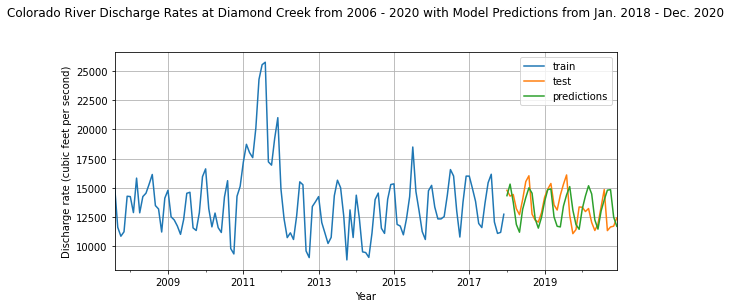

In [ ]:
fig, ax = plt.subplots(figsize=(9, 4))
data_train['DC_INFLOW'].plot(ax=ax, label='train')
data_test['DC_INFLOW'].plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions')

plt.title("Colorado River Discharge Rates at Diamond Creek from 2006 - 2020 with Model Predictions from Jan. 2018 - Dec. 2020\n\n")
plt.xlabel("Year")
plt.ylabel("Discharge rate (cubic feet per second)")
plt.grid(True)
ax.legend();